In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [4]:
df_main = pd.read_csv('merged_df.csv')
df_main.head()

,Unnamed: 0,county_code,COUNTY,STATEABBREVIATION,YEAR,AMAT_fac,HIVdiagnoses,HIVincidence,HIVprevalence,MH_fac,...,pctunmetneed,nonmedpain,ADULTMEN,MSM12MTH,MSM5YEAR,%msm12month,%msm5yr,unemployment_rate,poverty_rate,household_income
0,0,1001,Autauga County,AL,2015,0.0,5.0,10.9,225.5,1.0,...,95.70,5.12,19410,333,514,1.715611,2.648120,8.5,12.8,20304
1,1,1003,Baldwin County,AL,2015,0.0,15.0,8.7,163.9,4.0,...,91.34,5.27,69724,925,1429,1.326659,2.049509,8.6,13.8,73058
2,2,1005,Barbour County,AL,2015,0.0,0.0,0.0,436.0,1.0,...,91.34,5.27,11567,82,127,0.708913,1.097951,14.2,24.1,9145
3,3,1007,Bibb County,AL,2015,0.0,0.0,0.0,191.9,0.0,...,91.86,5.62,9508,119,184,1.251578,1.935212,10.9,17.0,7078
4,4,1009,Blount County,AL,2015,0.0,5.0,10.4,95.4,1.0,...,91.86,5.62,21368,601,928,2.812617,4.342943,9.3,17.3,20934


In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3140 non-null   int64  
 1   county_code        3140 non-null   int64  
 2   COUNTY             3140 non-null   object 
 3   STATEABBREVIATION  3140 non-null   object 
 4   YEAR               3140 non-null   int64  
 5   AMAT_fac           3140 non-null   float64
 6   HIVdiagnoses       3140 non-null   float64
 7   HIVincidence       3140 non-null   float64
 8   HIVprevalence      3140 non-null   float64
 9   MH_fac             3140 non-null   float64
 10  Med_AMAT_fac       3140 non-null   float64
 11  Med_MH_fac         3140 non-null   float64
 12  Med_SA_fac         3140 non-null   float64
 13  Med_SMAT_fac       3140 non-null   float64
 14  Med_TMAT_fac       3140 non-null   float64
 15  PLHIV              3140 non-null   float64
 16  Population         3140 

(0.0, 200.0)

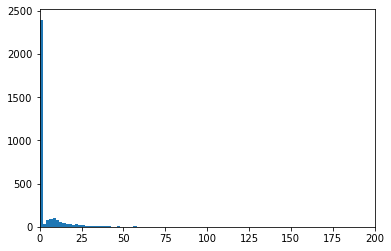

In [30]:
plt.hist(df_main['HIVincidence'], bins=400)
plt.xlim(left=0, right=200)
# plt.ylim(top=250);

In [7]:
df_main['HIVincidence'].describe()

count    3140.000000
mean        4.046911
std        16.575690
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       771.400000
Name: HIVincidence, dtype: float64

Vast majority of counties have an incidence rate of zero.

In [23]:
df_no_outliers = df_main[~((df_main['HIVincidence'] ==0) | (df_main['HIVincidence'] > 100))]

In [12]:
df_main.corr()['HIVincidence'].sort_values(ascending=False)

HIVincidence         1.000000
HIVprevalence        0.421939
HIVdiagnoses         0.267121
PLHIV                0.221498
bup_phys             0.196197
drugdeaths           0.195530
%msm12month          0.195191
%msm5yr              0.195110
household_income     0.192512
Population           0.185847
ADULTMEN             0.184088
Med_MH_fac           0.182766
MH_fac               0.181823
Med_SA_fac           0.176013
SMAT_fac             0.173340
MSM12MTH             0.169512
MSM5YEAR             0.169510
SA_fac               0.165988
TMAT_fac             0.165896
Med_SMAT_fac         0.148172
AMAT_fac             0.146125
num_SSPs             0.145353
Med_TMAT_fac         0.141801
unemployment_rate    0.132974
drugdep              0.118851
Med_AMAT_fac         0.115791
drugdeathrate        0.114383
poverty_rate         0.091102
partD30dayrxrate     0.090035
nonmedpain           0.066670
pctunins             0.051883
pctunmetneed         0.044500
mme_percap           0.041639
drugdeathr

In [25]:
df_no_outliers['HIVincidence'].describe()

count    745.000000
mean      15.861745
std       12.553282
min        1.500000
25%        7.400000
50%       11.500000
75%       21.300000
max       90.700000
Name: HIVincidence, dtype: float64

In [29]:
df_no_outliers.corr()['HIVincidence'].sort_values(ascending=False)

HIVincidence         1.000000
HIVprevalence        0.712629
poverty_rate         0.456296
pctunins             0.410541
unemployment_rate    0.341830
HIVdiagnoses         0.322255
PLHIV                0.310832
pctunmetneed         0.270963
drugdep              0.156056
%msm5yr              0.148199
%msm12month          0.148175
MSM5YEAR             0.146951
MSM12MTH             0.146950
bup_phys             0.113190
AMAT_fac             0.084436
nonmedpain           0.082629
household_income     0.071924
Population           0.070461
Med_MH_fac           0.067594
ADULTMEN             0.067525
MH_fac               0.064977
Med_SA_fac           0.061633
SMAT_fac             0.060142
partD30dayrxrate     0.057615
SA_fac               0.048230
Med_AMAT_fac         0.046140
num_SSPs             0.045063
Med_SMAT_fac         0.042629
TMAT_fac             0.041488
drugdeaths           0.033743
Med_TMAT_fac         0.023717
county_code         -0.038035
Unnamed: 0          -0.042873
drugdeathr

Possible columns to eliminate: HIV diagnoses, PLHIV, %msm12month, MSM12MTH, MSM5YEAR

In [ ]:
df_no_outliers.drop(labels=[['%msm12month', 'MSM12MTH', 'MSM5YEAR', 'PLHIV', '']])